In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Required Functions
1. Need list or Database to take in Measured & Calculated values per droplet ionization
> Droplet Database: 
>> Idetifier: Droplet(i) for $i \in (1,2,3...)$ for a specific ionization<br>

>> Set:<br>
>> - V, b, g, p, $\eta_0$, $\rho$, d<br>

>> Measured/Computed:<br>
>> - $v_{y0i}$ = $\frac{ x_{i0}}{ t_{i0}}$<br>
>> - $a$<br>
>> - $\eta_{eff}$<br>
>> - $v_{yEi}$= $\frac{ x_{iE}}{ t_{iE}}$<br>
>> - $q$<br>


2. Need equation/function for radius (simplified for coding)
> $$a = \sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9v_{y0}\eta_0}{2 \rho g}} -\left(\frac{b}{2p}\right)$$
> > $$a = \sqrt{\left(\alpha\right)^2 + \beta} -\left(\alpha\right)$$


3. Need equation/function for charge (simplified for coding)
> $$ q = \frac{4}{3}\pi \rho g \frac{d}{V}\left(
\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9v_{y0}\eta_0}{2 \rho g}} -\left(\frac{b}{2p}\right)
\right)^3 \cdot \frac{v_{yE}-v_{y0}}{v_{y0}}$$
> > $$ q = \frac{4}{3}\pi \rho g \frac{d}{V}a^3 \cdot \frac{v_{yE}-v_{y0}}{v_{y0}}$$

4. Need equations for Error propagation 
5. Need Graphs see images saved from speaking with the professor 

In [2]:
# Constants 

b   = 8.20E-3         # Viscostiy Correction Factor (given)
g   = 9.80            # Gravity (given)
p   = 1.013E5         # Atmospheric Pressure (at room temp? - given in docs)
n_o = 1.824E-5        # Tabulated Viscosity/ Viscocity of air (given)
rho1 = 8.86E2         # Density of oil droplet (given)
rho2 = 0              # To be determined for accuracy   

#Stored List 
Constants = [b, g, p, n_o,rho1 ,rho2]

In [3]:
print("Given Constants:".upper())
print(f"Viscostiy Correction Factor:\t\t\t b \t= {b:.2e} N/m")
print(f"Gravity:\t\t\t\t\t g \t= {g:.2e} m/s^2")
print(f"Atmospheric Pressure:\t\t\t\t p \t= {p:.3e} N/m^2")
print(f"Viscocity of air(ucorrected for radius):\t n_o \t= {n_o:.3e} N-s/m^2")
print(f"Densidty of Oil Droplet:\t\t\t rho \t= {rho1:.2e} kg/m^3")

GIVEN CONSTANTS:
Viscostiy Correction Factor:			 b 	= 8.20e-03 N/m
Gravity:					 g 	= 9.80e+00 m/s^2
Atmospheric Pressure:				 p 	= 1.013e+05 N/m^2
Viscocity of air(ucorrected for radius):	 n_o 	= 1.824e-05 N-s/m^2
Densidty of Oil Droplet:			 rho 	= 8.86e+02 kg/m^3


In [4]:
# Separation of plates (d) 
d   = 7.752E-3      # meters

# Error in Separation (?)

## Functions for radius $a$ 

> $$a = \sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9v_{y0}\eta_0}{2 \rho g}} -\left(\frac{b}{2p}\right)$$
> > $$a = \sqrt{\left(\alpha\right)^2 + \beta} -\left(\alpha\right)$$

In [5]:
# Fuction for radius a 
# assuming b, p, n_o, g are all set 
# inputs (x,t) for E = 0 

def radius(v_y0):     
    # Function: Takes (positive) velocity returns radius
    # Components of a 
    # terminal velocity with E = 0 
    
    # convert mm to m 
    v_y0 = v_y0
    
    # alpha 
    alpha = b/(2*p)

    #beta
    beta = (9*v_y0*n_o)/(2*rho1*g)
    
    #radius a 
    a = np.sqrt((alpha**2)+beta) - alpha
   
    return a

## Function for charge $q$

- $q_1 = q_2=  q$ They are just expressed differently 

> $$ q = \frac{4}{3}\pi \rho g \frac{d}{V}\left(
\sqrt{\left(\frac{b}{2p}\right)^2 + \frac{9v_{y0}\eta_0}{2 \rho g}} -\left(\frac{b}{2p}\right)
\right)^3 \cdot \frac{v_{yE}-v_{y0}}{v_{y0}}$$
> > $$ q_1 = \frac{4}{3}\pi \rho g \frac{d}{V}a^3 \cdot \frac{v_{yE}-v_{y0}}{v_{y0}}$$

>>$$ q_2 = 18 \pi d \left( \frac{\eta_0^3}{2g\rho}\right)^{\frac{1}{2}}\cdot 
\left( \frac{1}{(1+\frac{b}{pa})}\right)^{\frac{3}{2}} \sqrt{v_{y0}}\cdot
\frac{(v_{yE}-v_{y0})}{V}
$$

In [6]:
# q1 - opting to just use one equation

def q1(a,v_y0,v_yE,V):
     # Funtion: Takes radius,Velocity E=0 and Velocity E != 0 
    #velocity: v_y0 E=0 
    #velocity: v_yE E != 0

    # convert mm to m 
    v_y0 = (v_y0)
    v_yE = -(v_yE) 


    #left term (lt) 
    lt = (4/3)*np.pi*rho1*g*(d/V)*(a**3)

    #right term (rt)
    rt = (v_yE - v_y0)/ v_y0

    q1 = lt*rt
    
    return q1

## Function for Effective Viscosity $\eta_{eff}(a)$ - if needed for paper

$$\eta_{eff}(a) = \frac{\eta_0}{1 + \frac{b}{pa}}
$$

In [7]:
# effective viscosity 

def neff(a): 
    n_effa = n_o/(1 + (b/(p*a)))

    return n_effa

# Function to pull data and create a list - per droplet

> Droplet_Values(Vf1,Vr1, Vf2,Vr2,Vf3,Vr3,vf av, vr av, Volts V)
>> RETURN: list of selected drop

In [8]:

def Droplet_Values(n_drop, n_ionized, csv_name_as_string):
    # Funtion: Choose Droplet, Choose ionization, Call "file.csv"
    # Return a list of paramerters per droplet selected 
    # E.g.: droplet1_ionization2 = [velocities, Voltage]


    # Call the CSV file
    droplet = pd.read_csv(csv_name_as_string)

    # Select the specified droplet by droplet # and Ionization (rows)
    d1 = droplet[droplet['Droplet'].isin([n_drop]) & droplet['Ionized'].isin([n_ionized])]

    # Select the specified parameters (Velocities and Volts) (columns)
    d1 = d1[["Vf1","Vr1","Vf2","Vr2","Vf3","Vr3","vf av","vr av","Volts V","vf stdev", "vr stdev"]]

    # Convert to array, already is a float
    d1 = d1.to_numpy()

    # Assign a list 
    d1_values = []

    # use a for loop to unpack the 0th element into our desired list

    for value in d1[0]:
        d1_values.append(value)

    return d1_values


# Function to pull ALL droplets and place them in a list of lists 
> Important, Each Droplet and Ionizatoin requires an input no empty rows

In [9]:
def CreateDropsDatabase(csv_file_name_as_string): # "filename.csv"
    # Function: Takes "file.csv" Returns list of lists for our drops
    # dependent on the function Droplet_Values()
    # E.g.: Drops = [d1[velocities,Voltage],...dn[velocities,Voltage]]
    # Full detial of function found in Oil-Drop.ipynb

    drops = []
   
    droplet_number = 1 
   
    while droplet_number is not None: 

        ionization_number = 0

       
        while ionization_number is not None: 
         

            try:
                d = Droplet_Values(droplet_number, ionization_number, csv_file_name_as_string)
        
                drops.append(d)
                ionization_number += 1

            except IndexError:
               
                if ionization_number == 0: 
                   
                    droplet_number = None
                    break
                else:
                    
                    ionization_number = None
        
        if droplet_number is not None:
            droplet_number += 1
    return drops 

# Use Functions and Pull Drops
>Droplet_Values(Vf1,Vr1, Vf2,Vr2,Vf3,Vr3,vf av, vr av, Volts V)

In [10]:
all_drops = CreateDropsDatabase("Velocities.csv")
print(f"\nWe have {len(all_drops)} drops to examine.")
print(f"Some have multiple ionizations, we will only examine 1 per set of ionizations.")
print(f"Each drop has {len(all_drops[0])} parameters.\n")

for x in all_drops: 
    print(x)


We have 40 drops to examine.
Some have multiple ionizations, we will only examine 1 per set of ionizations.
Each drop has 11 parameters.

[3.65e-05, 0.00025, 4.72e-05, 0.000263, 3.7e-05, 0.000132, 4.02e-05, 0.000215, 501.0, 6.01e-06, 7.25e-05]
[0.000119, 4.31e-05, 0.000116, 4.39e-05, 0.000114, 0.0002, 0.000116, 9.57e-05, 501.0, 2.71e-06, 9.04e-05]
[0.000125, 0.000179, 0.000114, 0.000208, 0.000125, 0.0002, 0.000121, 0.000196, 501.0, 6.56e-06, 1.54e-05]
[8.77e-05, 0.000556, 0.000125, 0.000625, 0.000114, 0.000556, 0.000109, 0.000579, 501.0, 1.91e-05, 4.01e-05]
[0.000111, 0.000714, 0.000119, 0.000833, 0.000122, 0.000833, 0.000117, 0.000794, 501.0, 5.61e-06, 6.87e-05]
[3.76e-05, 0.000185, 3.23e-05, 0.000217, 4.24e-05, 0.000172, 3.74e-05, 0.000192, 501.0, 5.06e-06, 2.32e-05]
[3.01e-05, 0.000417, 2.7e-05, 0.000333, 2.44e-05, 0.000357, 2.72e-05, 0.000369, 501.0, 2.87e-06, 4.29e-05]
[2.79e-05, 0.000357, 3.31e-05, 0.000263, 2.92e-05, 0.000313, 3.01e-05, 0.000311, 501.0, 2.69e-06, 4.7e-05]
[4.55

# Create a list of drops with 0 ionizations 
> manual inputs

In [11]:
# Test Call a droplet from list 
# print(all_drops[0])
print('Test call to droplet index 6:')
print(all_drops[6])

Test call to droplet index 6:
[3.01e-05, 0.000417, 2.7e-05, 0.000333, 2.44e-05, 0.000357, 2.72e-05, 0.000369, 501.0, 2.87e-06, 4.29e-05]


In [12]:
# # LETS NOT DO THIS AND KEEP ALL VALUES
# # just add as you go - requires looking at the csv file 
# drops_no_ionization = [
#     all_drops[0],all_drops[1],all_drops[5],
#     all_drops[6],all_drops[7],all_drops[8],
#     all_drops[9],all_drops[10],all_drops[11],
#     all_drops[12],all_drops[13],all_drops[14],
#     all_drops[17],all_drops[20],all_drops[21],
#     all_drops[23],all_drops[26],all_drops[27],
#     all_drops[32],all_drops[33],all_drops[34],
#     all_drops[35]
#     ]
# print(f"\nFrom our list of  {len(all_drops)} we will only examine {len(drops_no_ionization)}.")
# print(f"Each drop has {len(drops_no_ionization[0])} parameters.\n")

# for x in drops_no_ionization: 
#     print(x)

In [13]:
# # LETS NOT DO THIS AND KEEP ALL VALUES
# # Test call droplet in list 
# print('Test call to droplet index 7:')
# print(drops_no_ionization[7])

# Function to extract parameters per drop and create list<br>
# (Velocities are NOT Averaged)

In [14]:
def Radii_Charge_NotAveragedVel(drops_list_of_lists): 
    # droplet = to loop through
    # drops a list of lists previously created

    # function takes list to loop through
    # returns two lists one for radius and one for charge 
    list_of_radius_values = []
    list_of_charge_values =[]


    for droplet in drops_list_of_lists: 
        # n = index value of 1droplets parameters
        # n = 0  
        # print(droplet)
        for i in range(3): 
            idx = i * 2

            # if n > 4: 
            #     break
            # else: 
            if droplet[idx] ==0 or droplet[idx+1] ==0: 
                list_of_radius_values.append(0)
                list_of_charge_values.append(0)
                print("no value vf.vr")
                continue
            else:
                # print(n)
                # print('new drop vf.vr')
                # print(droplet[n])
                # print(droplet[n+1])

                ri = radius(droplet[idx])
                list_of_radius_values.append(ri)

                #calculate charge 
                qi = q1(ri,droplet[idx],droplet[idx+1],droplet[8])
                list_of_charge_values.append(qi)
                # n += 2
    return list_of_radius_values, list_of_charge_values

# Function to extract parameters per drop and create list<br>
# (Velocities ARE Averaged)

In [15]:
def Radii_Charge_VelAVERAGED(drops_list_of_lists):
    #   Pulls the velocity that is already averaged 
    #   Returns two lists 
    list_of_radius_values_velAV = []
    list_of_charge_values_velAV =[]

    for droplet in drops_list_of_lists: 
    #Droplet should have 8 indecies we want index 6 & 7
    #index 6 = vel E=0
    #index 7 = vel E!=0

        #Cal Radius and save
        ri_velav = radius(droplet[6])
        list_of_radius_values_velAV.append(ri_velav)

        #Cal Charge and save 
        qi_velav = q1(ri_velav, droplet[6], droplet[7], droplet[8])
        list_of_charge_values_velAV.append(qi_velav)
    return list_of_radius_values_velAV, list_of_charge_values_velAV
            

In [16]:
#Assign lists 
r_vel_notav, q_vel_notav = Radii_Charge_NotAveragedVel(all_drops)
r_velav, q_velav = Radii_Charge_VelAVERAGED(all_drops)

In [17]:
#test pull paramater 
print(all_drops[9][0])

4.55e-05


In [18]:
# # Testing Cell- all functions work 

# # preform function by hand
# r11= radius(drops_no_ionization[9][4]) 
# q11 = q1(r11,drops_no_ionization[9][4],drops_no_ionization[9][5],drops_no_ionization[9][8])
# # print(q11)

# # Reshape to view 
# q = q_vel_notav
# q_arr = np.array(q)
# q_reshap= q_arr.reshape(-1,3)
# # print(q_reshap[9])
# print(q_reshap)

In [19]:
# print to see list 
print("Charges from velocites, not averaged velocites:")
print(f"Amount of charge's = {len(q_vel_notav)}")
print(q_vel_notav) # this values is defined later and it is a reshaping

print("Charges from averaged Velocites:")
print(f"Amount of charge's = {len(q_velav)}")
print(q_velav)

# there are several values I feel should be removed 


Charges from velocites, not averaged velocites:
Amount of charge's = 120
[-7.282154900016322e-19, -9.191948739047075e-19, -4.330954557967318e-19, -8.1571952680255e-19, -7.932744829982196e-19, -1.5427253689718898e-18, -1.5722442396439971e-18, -1.5820304739138485e-18, -1.6808532167246677e-18, -2.7288400845789594e-18, -3.8788920385953875e-18, -3.291802538889064e-18, -3.993380008985906e-18, -4.790653852659022e-18, -4.872841729084317e-18, -5.760070068261798e-19, -5.883941325284737e-19, -5.96159070745751e-19, -1.010685833293075e-18, -7.610416052454895e-19, -7.570027435041341e-19, -8.303592232111648e-19, -7.093399744662452e-19, -7.592628835144512e-19, -1.3410769663679097e-18, -4.691070500802344e-19, -4.2695801329095585e-19, -8.945345818908111e-19, -7.23839753964065e-19, -5.269710822990283e-19, -5.668082502171361e-19, -4.871021721467769e-19, -7.792005420373257e-19, -7.229344436527601e-19, -5.94337332141912e-19, -6.489069877460233e-19, -9.998684046618863e-19, -1.0673565234702633e-18, -9.0178959

# Sample Variance Function
$$ 
s^2 = \frac{1}{n-1}\Sigma(x_i - \mu)^2
$$

> $s^2$ : Sample (finite) Variance<br>
$x_i$ : sample value<br>
$\mu$ : mean value of samples<br>
n : number of "bounces"<br>
>> e.g.: D1_ionization1 = [1(vf,vr), 2(vf,vr), 3(vf,vr)], n =  3 for 3 "bounce recordings" 

# Simple Average Vs Weighted Average 
> `Simple` is used if the uncertianty is consistent for each measure<br>
`Weighted` is used to incerase our uncertianty and would be due to each measurement having different uncertainies 

## Simple Average and it's Uncertianty 
$$
\bar{X} = \frac{1}{n}\Sigma x_i \\
$$
$$
\sigma_{\bar{X}} = \frac{\sigma_x}{\sqrt{n}}
$$
> where `$\sigma_x$` is the assigned uncertainty not a calculated one (?)


## Weighted 
$$
\bar{X} = \Sigma \left(\frac{x_i}{\sigma_{x_i}^2} \cdot \frac{1}{\Sigma \frac{1}{\sigma_{x_i}^2}} \right)
$$

>>> Q: is the uncertainty $\sigma_{\bar{X}}$ the same for both simple an weighted?<br>
>>> Q: major issue I see is each uncertainty per droplet would be assumed to be identical - I cannot remember if we can do that

# Convert - NonAveraged values to Simple Averaged values 
> Still only working with droplets -not ionized

In [20]:
# Take list change it into an array, reshape it, compute .mean
# radius values 
r_vel_notav_array = np.array(r_vel_notav)
r_vel_notav_reshape = r_vel_notav_array.reshape(-1,3)

#Averaged radius values 
rAV_vel_notav = r_vel_notav_reshape.mean(axis=1)


# charge values
q_vel_notav_array = np.array(q_vel_notav)
q_vel_notav_reshape = q_vel_notav_array.reshape(-1,3)


#Averaged charge values that require thier velocity's STD's to 
#   propagate and obtain correct charge STD values- OR see next block
qAV_vel_notav = q_vel_notav_reshape.mean(axis =1)


In [ ]:
# #code to find factors 
# q_list = sorted(qAV_vel_notav)
# e_list = list.copy(q_list)
# e_list = np.array(e_list)
# # e_list = e_list/(1.60217*10**(-19))


# do not run more than once
 
# by hand adjust all values 
e_list[0] = e_list[0]/28
e_list[1] = e_list[1]/20
e_list[2] = e_list[2]/20
e_list[3] = e_list[3]/18
e_list[4] = e_list[4]/14
e_list[5] = e_list[5]/13
e_list[6] = e_list[6]/12
e_list[7] = e_list[7]/11
e_list[8] = e_list[8]/10
e_list[9] = e_list[9]/10
e_list[10] = e_list[10]/8
e_list[11] = e_list[11]/8
e_list[12] = e_list[12]/8
e_list[13] = e_list[13]/7
e_list[14] = e_list[14]/7
e_list[15] = e_list[15]/7
e_list[16] = e_list[16]/6
e_list[17] = e_list[17]/6
e_list[18] = e_list[18]/6
e_list[19] = e_list[19]/6
e_list[20] = e_list[20]/5
e_list[21] = e_list[21]/4
e_list[22] = e_list[22]/4
e_list[23] = e_list[23]/4
e_list[24] = e_list[24]/4
e_list[25] = e_list[25]/4
e_list[26] = e_list[26]/4
e_list[27] = e_list[27]/4
e_list[28] = e_list[28]/4
e_list[29] = e_list[29]/3
e_list[30] = e_list[30]/3
e_list[31] = e_list[31]/3
e_list[32] = e_list[32]/2
e_list[33] = e_list[33]/2
e_list[34] = e_list[34]/2
e_list[35] = e_list[35]/2
e_list[36] = e_list[36]/2
e_list[37] = e_list[37]/2
e_list[38] = e_list[38]/1
e_list[39] = e_list[39]/1

In [39]:
# # np.savetxt("e_list.txt", e_list, delimiter =", ")

# # e_values = list.copy()
# print(np.average(e_list))
# print(np.std(e_list))
# # print(e_list)

In [40]:
# #same but now on the averaged values 

# q_list2 = sorted(q_velav)
# e_list2 = list.copy(q_list2)
# e_list2 = np.array(e_list2)
# # e_list2 = e_list2/(1.60217*10**(-19))
# # np.savetxt("qav2.txt", e_list2, delimiter =", ")
# print(e_list2)

#Do not run more than once 
e_list2[0] = e_list2[0]/28
e_list2[1] = e_list2[1]/20
e_list2[2] = e_list2[2]/20
e_list2[3] = e_list2[3]/18
e_list2[4] = e_list2[4]/14
e_list2[5] = e_list2[5]/14
e_list2[6] = e_list2[6]/12
e_list2[7] = e_list2[7]/11
e_list2[8] = e_list2[8]/10
e_list2[9] = e_list2[9]/10
e_list2[10] = e_list2[10]/8
e_list2[11] = e_list2[11]/8
e_list2[12] = e_list2[12]/8
e_list2[13] = e_list2[13]/7
e_list2[14] = e_list2[14]/7
e_list2[15] = e_list2[15]/7
e_list2[16] = e_list2[16]/6
e_list2[17] = e_list2[17]/6
e_list2[18] = e_list2[18]/6
e_list2[19] = e_list2[19]/6
e_list2[20] = e_list2[20]/5
e_list2[21] = e_list2[21]/4
e_list2[22] = e_list2[22]/4
e_list2[23] = e_list2[23]/4
e_list2[24] = e_list2[24]/4
e_list2[25] = e_list2[25]/4
e_list2[26] = e_list2[26]/4
e_list2[27] = e_list2[27]/4
e_list2[28] = e_list2[28]/4
e_list2[29] = e_list2[29]/3
e_list2[30] = e_list2[30]/3
e_list2[31] = e_list2[31]/3
e_list2[32] = e_list2[32]/2
e_list2[33] = e_list2[33]/2
e_list2[34] = e_list2[34]/2
e_list2[35] = e_list2[35]/2
e_list2[36] = e_list2[36]/2
e_list2[37] = e_list2[37]/2
e_list2[38] = e_list2[38]/1
e_list2[39] = e_list2[39]/1

print(e_list2)

In [73]:
e_val_velnotav = np.loadtxt('e_list.txt', delimiter=',', dtype=float)[:-2]
e_val_velav = np.loadtxt('e2_list.txt', delimiter=',', dtype=float)
print(e_val_velnotav)
print(len(e_val_velnotav))


[-1.62581852e-19 -1.64992244e-19 -1.63016386e-19 -1.66862344e-19
 -1.62516300e-19 -1.72022049e-19 -1.67107780e-19 -1.72854892e-19
 -1.64768785e-19 -1.61170931e-19 -1.75106354e-19 -1.65725054e-19
 -1.61045949e-19 -1.69867452e-19 -1.68860554e-19 -1.68043218e-19
 -1.81440406e-19 -1.75095521e-19 -1.66511736e-19 -1.64945251e-19
 -1.68582012e-19 -1.99476670e-19 -1.91580173e-19 -1.86428502e-19
 -1.78778785e-19 -1.74114228e-19 -1.73375485e-19 -1.63848230e-19
 -1.62411277e-19 -2.07933182e-19 -2.03678996e-19 -1.95617801e-19
 -2.36875172e-19 -2.15150658e-19 -2.13504165e-19 -2.12685052e-19
 -1.72299732e-19 -1.60490234e-19]
38


In [26]:
# Take the 3 charges per droplet and take their STD and VAR

qSTD_vel_notav = q_vel_notav_reshape.std(axis =1)
qVAR_vel_notav = q_vel_notav_reshape.var(axis =1)


# Assinged lists 

In [27]:
#       qAV_vel_notav  - Charges are averaged 
#       q_velav        - Velocities are averaged, some drops are questionable 


In [74]:
# print(np.average(e_val_velav))
# print(np.std(e_val_velav))
sigma = np.std(e_val_velnotav)/(10**(-19))
mu = np.average(e_val_velnotav)/(10**(-19))
print(sigma)
print(mu)

0.1881461535251771
-1.7819382670344062


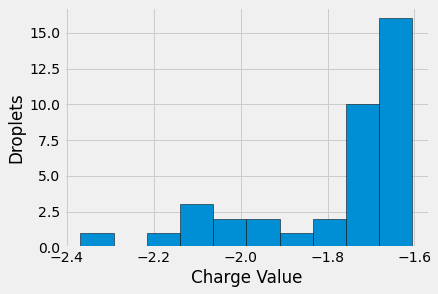

In [77]:
plt.style.use('fivethirtyeight')
n_bins = []
e = e_val_velnotav/(10**(-19))
plt.hist(e, 10, edgecolor ='black') # log =True give more but... not needed
plt.tight_layout()
plt.xlabel("Charge Value")
plt.ylabel("Droplets")
plt.show()



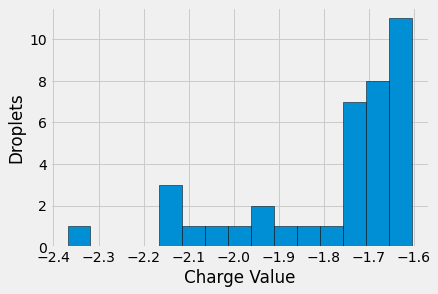

In [82]:
plt.style.use('fivethirtyeight')
n_bins = []
e2 = e_val_velav/(10**(-19))
plt.hist(e, 15, edgecolor ='black') # log =True give more but... not needed
plt.tight_layout()
plt.xlabel("Charge Value")
plt.ylabel("Droplets")
plt.show()

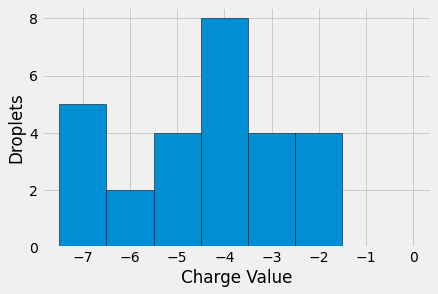

In [81]:
plt.style.use('fivethirtyeight')
# n_bins = [-4E-19,-3E-19,-2E-19,-1E-19]
n_bins = [-7.5,-6.5,-5.5,-4.5,-3.5,-2.5,-1.5,0]
# n_bins = [-9,-8,-7,-6,-5,-4,-3,-2,-1,0]
qup22 = np.array(qAV_vel_notav)
eup = qup22/(1.60217*10**(-19))
plt.hist(eup, n_bins, edgecolor ='black') # log =True give more but... not needed
plt.tight_layout()
plt.xlabel("Charge Value")
plt.ylabel("Droplets")
plt.show()